In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches, rc, rcParams, lines, patheffects
from matplotlib.animation import FuncAnimation
import numpy as np
from tqdm import tqdm
plt.xkcd()
from IPython.display import display, clear_output, Video

100%|██████████| 200/200 [03:25<00:00,  1.03s/it]


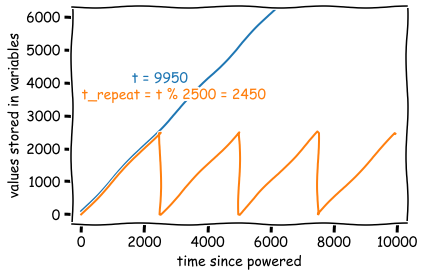

In [44]:
n = 10000
for i in tqdm(range(0, n, 50)):
    ts = np.arange(i)
    plt.close('all')
    plt.plot(ts,ts+100)
    plt.plot(ts,ts%2500)
    plt.xlabel("time since powered")
    plt.ylabel("values stored in variables")
    plt.xlim(0-300,n+300)
    plt.ylim(0-300,n*0.6+300)
    plt.text(10,n/2*0.8, "            t = %s"%i, color='C0')
    plt.text(10,n/2*0.7, "t_repeat = t %% 2500 = %s"%(i%2500), color='C1')
    plt.savefig("frame_%05d.png"%i,dpi=300,bbox_inches='tight')
    clear_output(wait=True)
    display(plt.gcf())

In [ ]:
!ffmpeg -y -framerate 20 -i 'frame_%05d.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 out.mp4

In [3]:
!rm -f "*.png" "*.mp4"

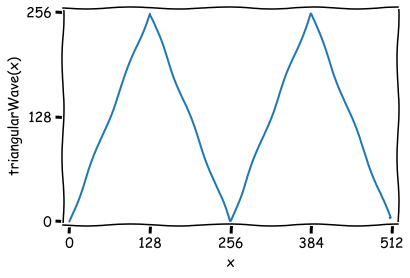

100%|██████████| 256/256 [02:06<00:00,  2.02it/s]


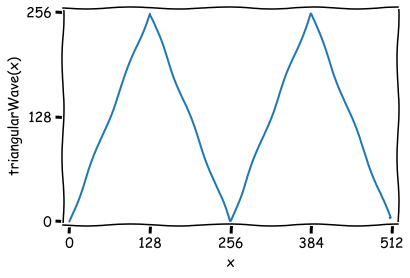

In [14]:
def triangular_wave(x):
    x = x%256
    if (x>0x7f):
        return (0xff-x)<<1
    else:
        return x<<1
        
n = 512
for i in tqdm(range(0, n, 2)):
    ts = np.arange(i)
    plt.close('all')
    plt.plot(ts,[triangular_wave(_) for _ in ts])
    plt.xlabel("x")
    plt.ylabel("triangularWave(x)")
    plt.ylim(-5,256+5)
    plt.xlim(-10,522)
    plt.yticks([0,128,256])
    plt.xticks([0,128,256,128*3,512])
    plt.savefig("frame_%05d.png"%i,dpi=300,bbox_inches='tight')
    clear_output(wait=True)
    display(plt.gcf())

In [16]:
!ffmpeg -y -framerate 20 -pattern_type glob -i 'frame_*.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 out.mp4

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l